# Data Sets
and some piplines

## Library

In [30]:
# Basic
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from pprintpp import pprint
import timeit 
from pandas.api.types import CategoricalDtype

# preprocessing
    # StandardScaler(), KFold()
from sklearn.preprocessing import  StandardScaler,  OneHotEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 
# selecting model  
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,validation_curve, learning_curve
    # Algorithms
from supervised.automl import AutoML
from sklearn.utils.fixes import loguniform
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.pipeline import Pipeline

models = []
models.append(('knn', KNeighborsClassifier()))
models.append(('dtree', DecisionTreeClassifier()))
models.append(('svm', SVC()))
# evaluation
from sklearn.metrics import f1_score, accuracy_score,roc_curve, confusion_matrix,classification_report

"""
* The DataFrame: 
    group1: ACC, FSC, LFT
    group2: ROC, APR, BEP
    group3: RMS, MXE
    group4: OPT-SELS
    - The **threshold** metrics are accuracy(ACC), F-score(FSC) and lift(LFT).
    - The **rank metrics** we use are area under the ROC curve (ROC),average precision(APR), and precision/recall break even point (BEP).
    - The **probability metrics**,squared error(RMS) and cross-entropy (MXE),interpret the predicted value of each case as the conditional probability of that case being in the positive class.
    - The last column,***OPT-SEL***,is the mean normalized score for the eight metrics when model selection is done by cheating and looking at the final testsets.(dont understand either.....)

* Within the Matric: 
    - The algorithm with the best performance on each metric is ***boldfaced***. Using t-test p= 0.05, others are *'ed in three trails if they still have good performance.
    
    """
seed = 7
results = []
names = []
prec, rec = 1, 1
def bep(y_true, y_pred):
    precision()
    return precision/recall
scorings = {}



## Data

In [31]:

url1 = "https://archive.ics.uci.edu/ml/datasets/Adult"
url2 = 'https://archive.ics.uci.edu/ml/datasets/Avila'
url3 = 'https://archive.ics.uci.edu/ml/datasets/Nursery'
url4 = 'http://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption'



### Dataset Information
1. ADULT
    * TARGET: >50K, <=50K.
    * VARIABLES/ ATTRIBUTES: ['age','workclass','fnlwgt','education',
    'education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country']
2.  AVILA
    * TARGET: {Class: A, B, C, D, E, F, G, H, I, W, X, Y}
    * VARIABLES/ ATTRIBUTES: ['0', '1', '2', '3', '4', '5', '6', '7', '8', 
    '9']
3. NURSERY
    * TARGET: NURSERY
    * VARIABLES/ ATTRIBUTES: nry_var = ['parents', 'has_nurs', 'form', 'children', 'housing','finance', 'social', 'health']
4. HOUSEHOLD POWER 
    * Time series
    * VARIABLES/ ATTRIBUTES: ['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3']
    * For EC! 
    

In [32]:

'''
get_df_name(df): 
    input: a dataframe.
    output: the name of this dataframe.
check_dataset(dataset): 
    goal: make sure fulfill the requirements of the dataset choice.
    input: a list of dataframes.
    output: print out the size information of each dataframe.
check_sample(dataset):
    goal: make sure choosing 5000 samples randomly.
    input: a list of dataframes:
    output: print out the size of information of each sampled dataframe.
'''

def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

def check_dataset(dataset):
    for i in dataset:
        if i.shape[0]>=10000:
            print('Dataset '+ get_df_name(i)+" fulfill the size requirements in the project having "+ str(i.shape[0])+" samples, which is over or equal to 10,000")
    return

def check_sample(dataset):
    for i in dataset:
        if i.shape[0]==5000:
            print('Successfully randomly choosing 5000 data samples from ' +get_df_name(i)+" dataset")
    return 

In [33]:
print('Start on reading raw data')
avlang = pd.read_csv('../data/train/avl_set/avila-tr.txt', header=None)
print('-')
adult_raw = pd.read_csv('../data/train/adult/adult.data', header=None)
print('-')
house_raw = pd.read_csv('../data/train/house_set/household_power_consumption.txt',sep=';')
print('-')
nursey_raw = pd.read_csv('../data/train/nursey/nursery.data',header=None)
print('-')
data_set = [avlang,adult_raw,house_raw,nursey_raw]
print('Finish reading 4 datasets ')
print('')
print('-')
print('Checking Dataset Size of datasets')
print(" .......")
check_dataset(data_set)
print(" .......")
print('Finish checking dataset')
print("")
print("")
print(".....StartRandome Sampling......")
print('Start sampling avlang dataset')
avlang.sample(n=5000, replace=False).to_csv('./data/avl.csv', index=False)
print(' Finished')
print('Start sampling adult dataset')
adult_raw.sample(n=5000, replace=False).to_csv('./data/adult.csv', index=False)
print(' Finished')
print('Start sampling house_income dataset')
house_raw.sample(n=5000, replace=False).to_csv('./data/income.csv', index=False)
print(' Finished')
print('Start sampling nursery dataset')
nursey_raw.sample(n=5000, replace=False).to_csv('./data/nsr.csv', index=False)
print(' Finished')
print("......")
print('Finish randome sampling, waiting for check')
print('Please continue to run.')










Start on reading raw data


FileNotFoundError: [Errno 2] No such file or directory: '../data/train/avl_set/avila-tr.txt'

In [34]:
print('Start checking size of training dataset')
print(' ......')
avl = pd.read_csv('./data/avl.csv')
ad = pd.read_csv('./data/adult.csv')
pwr = pd.read_csv('./data/income.csv')
nsr = pd.read_csv('./data/nsr.csv')

training = [avl, ad, pwr, nsr]
check_sample(training)
print(" .....")
print('Finish checking training dataset')
print('Sizes for All training samples dataset are :', avl.shape, ad.shape, pwr.shape, nsr.shape)

Start checking size of training dataset
 ......
Successfully randomly choosing 5000 data samples from avl dataset
Successfully randomly choosing 5000 data samples from ad dataset
Successfully randomly choosing 5000 data samples from pwr dataset
Successfully randomly choosing 5000 data samples from nsr dataset
 .....
Finish checking training dataset
Sizes for All training samples dataset are : (5000, 11) (5000, 15) (5000, 9) (5000, 9)


## EDA

### Data Cleaning

In [35]:
# Add missing variable names
# specify target columns
ad_var = ['age','workclass','fnlwgt','education',
    'education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','target']
ad.columns = ad_var
nsr_var = ['parents', 'has_nurs', 'form', 'children', 'housing','finance', 'social', 'health','target']
nsr.columns = nsr_var
avl=avl.rename(columns={"10":'target'})
pwr = pwr.rename(columns= {'Voltage': 'target'})
display(ad.head())
display(avl.head())
display(pwr.head())
display(nsr.head())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,40,Federal-gov,544792,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<=50K
1,54,Private,171924,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,<=50K
2,23,Private,133061,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,80,United-States,<=50K
3,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
4,19,Private,164395,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Female,0,0,25,United-States,<=50K


,0,1,2,3,4,5,6,7,8,9,target
0,0.229043,-0.016448,0.317424,-0.526838,0.261718,-0.058835,0.635431,-0.561067,-0.185368,-0.268865,F
1,0.006853,-0.181323,0.388552,0.301377,-0.095795,0.730137,0.371178,0.265990,0.219991,0.572511,A
2,0.290762,0.077766,0.118265,0.275805,0.261718,0.107265,0.144676,0.217996,-0.341275,0.150750,F
3,0.031541,-0.040001,0.175168,-0.107256,0.261718,2.515706,0.748682,-1.468097,-0.746634,1.891487,F
4,0.599358,-0.377602,0.242739,-0.151028,0.976743,-1.221530,-1.138838,1.187639,1.560794,-0.404919,I


,Date,Time,Global_active_power,Global_reactive_power,target,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,25/1/2010,10:47:00,1.444,0.088,242.600,5.800,0.000,0.000,19.0
1,14/11/2007,10:54:00,1.360,0.000,237.830,5.600,0.000,0.000,18.0
2,21/1/2007,14:19:00,1.758,0.406,243.950,7.400,0.000,0.000,18.0
3,9/1/2009,18:14:00,3.358,0.000,239.730,14.000,0.000,0.000,17.0
4,17/6/2009,23:43:00,0.428,0.076,242.830,1.800,0.000,0.000,1.0


,parents,has_nurs,form,children,housing,finance,social,health,target
0,pretentious,critical,incomplete,more,less_conv,inconv,problematic,priority,spec_prior
1,great_pret,improper,incomplete,2,critical,inconv,slightly_prob,recommended,spec_prior
2,usual,proper,completed,1,less_conv,inconv,slightly_prob,not_recom,not_recom
3,pretentious,improper,foster,3,less_conv,inconv,nonprob,not_recom,not_recom
4,usual,less_proper,foster,2,convenient,convenient,problematic,priority,priority


#### nan value

In [37]:
ad = pd.read_csv('./data/adult.csv')
print (ad.shape)

(5000, 15)


In [38]:
ad_var = ['age','workclass','fnlwgt','education',
    'education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','target']
ad.columns = ad_var
display(ad.head(30))


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,40,Federal-gov,544792,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<=50K
1,54,Private,171924,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,<=50K
2,23,Private,133061,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,80,United-States,<=50K
3,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
4,19,Private,164395,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Female,0,0,25,United-States,<=50K
5,37,Private,356824,HS-grad,9,Separated,Tech-support,Unmarried,White,Female,0,0,40,United-States,<=50K
6,24,Private,145964,Bachelors,13,Never-married,Exec-managerial,Unmarried,White,Male,0,0,40,United-States,>50K
7,42,Private,174112,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
8,48,Private,233511,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,>50K
9,40,Private,191544,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,35,United-States,<=50K


In [40]:
'''
 While we know from dataset that education and education-num are corresponded to each other,
1. We could assign category and order, based on its value, to education column and drop education-num column
2. 'fnlwgt' column could also be dropped since it is the final weight-- the number of people the census believes. Therefore, such column has no contibution to predition.
3. sign 0 and 1 to target, which will make the work easier.
'''
#ad = ad.drop(['education-num','fnlwgt'])

"\n While we know from dataset that education and education-num are corresponded to each other,\n1. We could assign category and order, based on its value, to education column and drop education-num column\n2. 'fnlwgt' column could also be dropped since it is the final weight-- the number of people the census believes. Therefore, such column has no contibution to predition.\n3. sign 0 and 1 to target, which will make the work easier.\n"

In [41]:
for col in ad:
    print(col,ad[col].unique(), " \n")
# find out non-meaning cell and replace with nan
# find our extreme numbers such as 0 and 9999 in int/float series and replace them with nan
# here we find " ?" in ['occupation', 'workclass', 'native-country']
# and extreme numbers 0 and 99999 in ['capital-loss','capital-gain']
# In addition , in order to aviod mess, we use copy of dataframe instead operating directly on it.
copy=ad.copy()
copy = copy.replace({' ?': np.nan, 0: np.nan, 99999: np.nan, })
copy.info()


age [40 54 23 18 19 37 24 42 48 38 49 22 47 41 57 61 56 51 34 59 31 30 68 53
 33 35 44 50 26 60 32 20 27 45 46 55 36 25 52 62 58 63 29 17 43 70 39 28
 69 64 21 73 75 66 67 65 72 76 90 79 71 88 77 81 80 74 84 78 82]  

workclass [' Federal-gov' ' Private' ' Local-gov' ' Self-emp-inc' ' ?' ' State-gov'
 ' Self-emp-not-inc' ' Never-worked' ' Without-pay']  

fnlwgt [544792 171924 133061 ...  33729 229803 312206]  

education [' Some-college' ' HS-grad' ' Bachelors' ' Masters' ' Doctorate'
 ' Prof-school' ' 7th-8th' ' Assoc-acdm' ' 11th' ' 12th' ' Assoc-voc'
 ' 10th' ' 9th' ' 5th-6th' ' 1st-4th' ' Preschool']  

education-num [10  9 13 14 16 15  4 12  7  8 11  6  5  3  2  1]  

marital-status [' Married-civ-spouse' ' Never-married' ' Separated' ' Divorced'
 ' Widowed' ' Married-spouse-absent' ' Married-AF-spouse']  

occupation [' Farming-fishing' ' Transport-moving' ' Sales' ' Other-service'
 ' Adm-clerical' ' Tech-support' ' Exec-managerial' ' Prof-specialty' ' ?'
 ' Craft-repair' ' Hand

<BarContainer object of 16 artists>

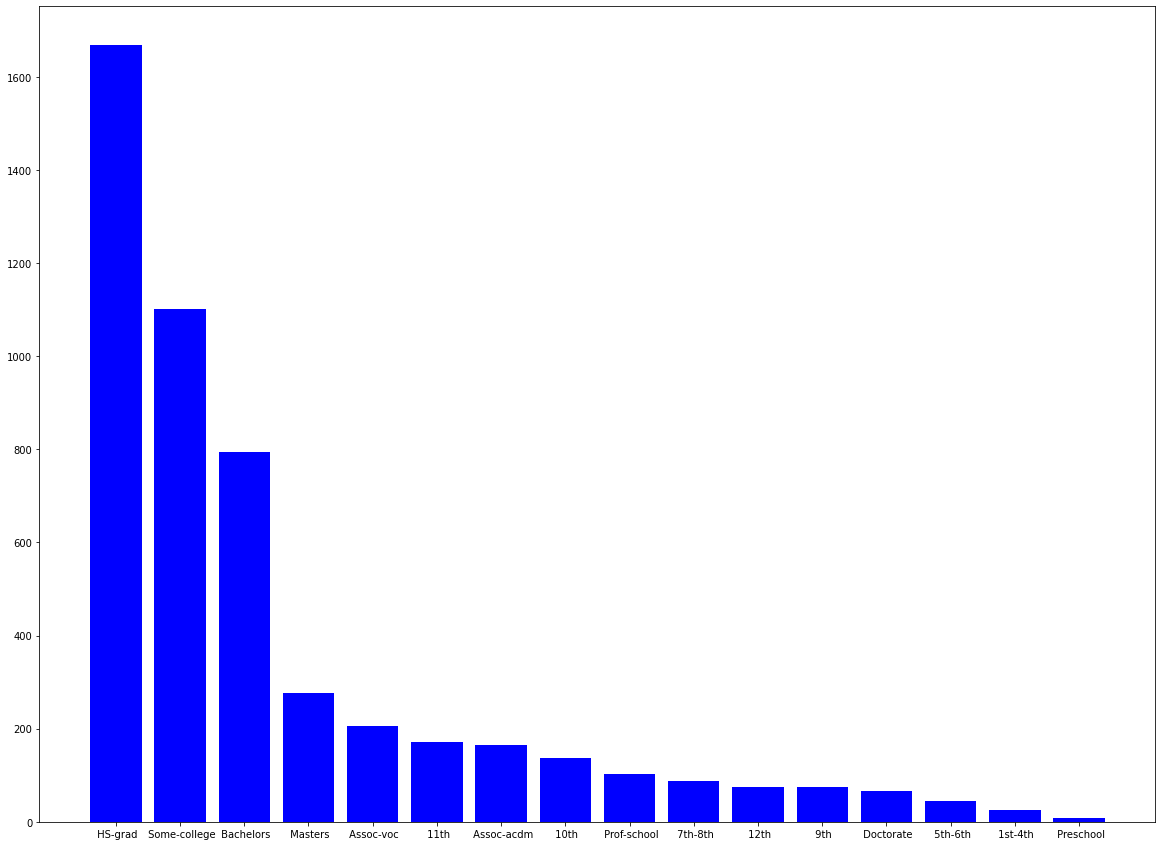

In [42]:
plt.figure(figsize=(20,15))
plt.bar(list(copy['education'].value_counts().index),list(copy['education'].value_counts()),color='red')
plt.bar(list(copy['education'].value_counts().index),list(copy['education-num'].value_counts()),color='blue')
# blue layer completely covered the red layer with the same values
# Therefore, we could prove that these two columns are exactly same and exclude one of them
# In order to be more effeciency, we drop education column.

In [43]:
'''
1. While we know from dataset and the figures showing above that education and education-num are corresponded to each other, we drop education column here.
2. 'fnlwgt' column could also be dropped since it is the final weight-- the number of people the census believes. Therefore, such column has no contibution to predition.
3. we only have hundreds of capital-gain and capital-loss record, these can be excluded. 
3. sign 0 and 1 to target, which will make the work easier.
'''
def incomeFixer(x):
    if x == " <=50K":
        return 0
    else:
        return 1
# with same aim, we use copy_drop to drop some columns
cp_dp=copy.copy()
col = 'education'
cp_dp["target"] = cp_dp.apply(lambda x: incomeFixer(x['target']), axis=1)
cp_dp = cp_dp.drop(columns=[col,'fnlwgt','capital-gain','capital-loss'])
display(cp_dp.info())
cp_dp.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   workclass       4703 non-null   object 
 2   education-num   5000 non-null   float64
 3   marital-status  5000 non-null   object 
 4   occupation      4701 non-null   object 
 5   relationship    5000 non-null   object 
 6   race            5000 non-null   object 
 7   sex             5000 non-null   object 
 8   hours-per-week  5000 non-null   float64
 9   native-country  4901 non-null   object 
 10  target          5000 non-null   int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 429.8+ KB


None

age                 0
workclass         297
education-num       0
marital-status      0
occupation        299
relationship        0
race                0
sex                 0
hours-per-week      0
native-country     99
target              0
dtype: int64

In [44]:
cp_dp.columns

Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'hours-per-week', 'native-country',
       'target'],
      dtype='object')

In [69]:
import json
od={} # < <
"""
parents ['usual' 'pretentious' 'great_pret']
has_nurs ['proper' 'less_proper' 'improper' 'critical' 'very_crit']
form ['complete' 'completed' 'incomplete' 'foster']
children ['1' '2' '3' 'more']
housing ['convenient' 'less_conv' 'critical']
finance ['convenient' 'inconv']
social ['nonprob' 'slightly_prob' 'problematic']
health ['recommended' 'priority' 'not_recom']
target ['recommend' 'priority' 'not_recom' 'very_recom' 'spec_prior']
"""
od['parents']= [ 'usual','pretentious','great_pret']  
od['has_nurs']= [ 'very_crit','critical','improper' ,'less_proper','proper'  ]  # proper, less_proper, improper, critical, very_crit
od['form']= [ 'foster' ,'incomplete','complete','completed']  # complete, completed, incomplete, foster
od['children']= ['1','2', '3', 'more' ]  

od['housing']= [ 'critical','less_conv','convenient']  # convenient, less_conv, critical
#od['finance']= ['convenient', 'inconv']  # binary 

od['social']= ['problematic','slightly_prob', 'nonprob']  # non-prob, slightly_prob, problematic

od['health']= ['not_recom' ,'priority','recommended' ]  # recommended, priority, not_recom
od['target']= ['not_recom','priority','spec_prior',  'recommend','very_recom'] 
json = json.dumps(od)
f = open("nsr_order.json","w")
f.write(json)
f.close()

In [73]:
df = pd.read_csv('./data/nsr.csv')
nsr_var = ['parents', 'has_nurs', 'form', 'children', 'housing','finance','social', 'health','target']
unique_counts = pd.DataFrame.from_records([(col, df[col].nunique()) for col in df.columns],columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
display(unique_counts)
df.columns = nsr_var
for col in df:
    if col =='finance':
        print("[finance] is column only has binary labels"" \n")
    else: 
        print("column_name : " + col, " => ",df[col].unique())
        print(" In (a<b<c) order," )
        print('   design the order to be: ',od[col], " \n")
        print("")
def check_item(raw, in_r):
    for i in in_r:
        if i in raw:
            pass
        else:
            print('wrong item is : ', i)
    #return'No Error Found in column ' 


,Column_Name,Num_Unique
5,5,2
0,0,3
4,4,3
6,6,3
7,7,3
2,2,4
3,3,4
1,1,5
8,8,5


column_name : parents  =>  ['pretentious' 'great_pret' 'usual']
 In (a<b<c) order,
   design the order to be:  ['usual', 'pretentious', 'great_pret']  


column_name : has_nurs  =>  ['critical' 'improper' 'proper' 'less_proper' 'very_crit']
 In (a<b<c) order,
   design the order to be:  ['very_crit', 'critical', 'improper', 'less_proper', 'proper']  


column_name : form  =>  ['incomplete' 'completed' 'foster' 'complete']
 In (a<b<c) order,
   design the order to be:  ['foster', 'incomplete', 'complete', 'completed']  


column_name : children  =>  ['more' '2' '1' '3']
 In (a<b<c) order,
   design the order to be:  ['1', '2', '3', 'more']  


column_name : housing  =>  ['less_conv' 'critical' 'convenient']
 In (a<b<c) order,
   design the order to be:  ['critical', 'less_conv', 'convenient']  


[finance] is column only has binary labels 

column_name : social  =>  ['problematic' 'slightly_prob' 'nonprob']
 In (a<b<c) order,
   design the order to be:  ['problematic', 'slightly_prob', 

In [74]:
#df = pd.read_csv('./data/nsr.csv')
df.head()

,parents,has_nurs,form,children,housing,finance,social,health,target
0,pretentious,critical,incomplete,more,less_conv,inconv,problematic,priority,spec_prior
1,great_pret,improper,incomplete,2,critical,inconv,slightly_prob,recommended,spec_prior
2,usual,proper,completed,1,less_conv,inconv,slightly_prob,not_recom,not_recom
3,pretentious,improper,foster,3,less_conv,inconv,nonprob,not_recom,not_recom
4,usual,less_proper,foster,2,convenient,convenient,problematic,priority,priority


In [75]:
# add order:
raw = df.copy()
raw = raw.replace({'inconv':0, 'convenient':1})
df = df.drop(columns = ['finance'])
for i in df.columns:
    print(i)
    print(df[i].unique())
    # make sure that columns are categorical type
    df[i] = df[i].astype('category')
    # obtain oder first
    r = od[i]
    print(od[i])
    
    #print(check_item(df[i].unique(), r))
    cat_r = CategoricalDtype(categories=r, ordered=True)
        # give the order
    df[i] = df[i].cat.reorder_categories(r, ordered=True)
df['finance'] = raw['finance']
df.to_csv('./cleaning_data/nsr.csv', index=False)
df.info()

parents
['pretentious' 'great_pret' 'usual']
['usual', 'pretentious', 'great_pret']
has_nurs
['critical' 'improper' 'proper' 'less_proper' 'very_crit']
['very_crit', 'critical', 'improper', 'less_proper', 'proper']
form
['incomplete' 'completed' 'foster' 'complete']
['foster', 'incomplete', 'complete', 'completed']
children
['more' '2' '1' '3']
['1', '2', '3', 'more']
housing
['less_conv' 'critical' 'convenient']
['critical', 'less_conv', 'convenient']
social
['problematic' 'slightly_prob' 'nonprob']
['problematic', 'slightly_prob', 'nonprob']
health
['priority' 'recommended' 'not_recom']
['not_recom', 'priority', 'recommended']
target
['spec_prior' 'not_recom' 'priority' 'very_recom' 'recommend']
['not_recom', 'priority', 'spec_prior', 'recommend', 'very_recom']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   parents   5000 non-null   category


From above, it shows that there are relatively small amount of missing values all from columns which are object types:

    - Categorical data with text that needs encoded: ['workclass', 'marital-status', 'occupation','relationship', 'race', 'sex', , 'native-country']
    - Categorical data that has null values: ['workclass','occupation','native-country']

However, I do not want to simply dropna() to handle these missing values, there must be smarter ways such as Replace by most frequent value.

we could also see that most of our columns are object while categorical, we could encode them using Integer Encoding/ One Hot Encoding/ Learned Embedding. 

But these how can we find the most effecient way to handle missing value and encode strings? 

1. We certainly need to practive on CategoricalImputer()

2. For the encoding part, we could combine the inputer with encode to have a pipline for preprocessing.

3. For extra credit, we could conbine these steps with a regular training-predicting process and use gradsearch to find out the best parameters and hyperparameters and try on BaseNEncoder to find the answer Later

We could design unique **pipeline** for these preprocessing steps while along with the training processes using gridsearchCV to find our best parameters as well as best hyperparameters.



In [16]:
# this function help us to fillna
categorical_missing = ['workclass','occupation','native-country']
def impute_nan_most_frequent_category(DataFrame,ColName):
    # .mode()[0] - gives first category name
     most_frequent_category=DataFrame[ColName].mode()[0]
    
    # replace nan values with most occured category
     DataFrame[ColName + "_Imputed"] = DataFrame[ColName]
     DataFrame[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)
     DataFrame[ColName] = DataFrame[ColName + "_Imputed"]
     DataFrame = DataFrame.drop([ColName + "_Imputed"], axis = 1)
     return DataFrame

for Columns in categorical_missing:
    clnd = impute_nan_most_frequent_category(cp_dp,Columns)
clnd.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 5000 non-null   float64
 1   workclass           5000 non-null   object 
 2   education-num       5000 non-null   float64
 3   marital-status      5000 non-null   object 
 4   occupation          5000 non-null   object 
 5   relationship        5000 non-null   object 
 6   race                5000 non-null   object 
 7   sex                 5000 non-null   object 
 8   hours-per-week      5000 non-null   float64
 9   native-country      5000 non-null   object 
 10  target              5000 non-null   int64  
 11  workclass_Imputed   5000 non-null   object 
 12  occupation_Imputed  5000 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 507.9+ KB


In [80]:
avl=pd.read_csv('../data/raw/avl_set/avila-tr.txt', header=None)
avl.columns = avl.columns.astype(str)
avl=avl.rename(columns={'10':'target'})
avl_train = avl.sample(n=5000, replace=False)
print(avl_train.shape)


(5000, 11)


In [83]:
avl_train.isna().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
target    0
dtype: int64

In [17]:
numeric_features = ['age','hours-per-week','education-num']
categorical_features = ['workclass', 'marital-status', 'occupation','relationship', 'race', 'sex', 'native-country']
y = cp_dp.target
X = cp_dp.drop(columns=['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

categorical_transformer = Pipeline(
    [
        ('imputer_cat', SimpleImputer(strategy = 'constant', fill_value = 'missing')),
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ]
)
numeric_transformer = Pipeline(
    [
        ('imputer_num', SimpleImputer()),
        ('scaler', StandardScaler())
    ]
)
preprocessor = ColumnTransformer(
    [
        ('categoricals', categorical_transformer, categorical_features),
        ('numericals', numeric_transformer, numeric_features)
    ],
    remainder = 'drop'
)
params = [{'classifier':[KNeighborsClassifier()],
    'classifier__n_neighbors' : [1,3,5,10,20,30,50],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}]
pipeline = Pipeline(
    [
        ('preprocessing', preprocessor),
        ('classifier', KNeighborsClassifier())
    ]
)


NameError: name 'make_scorer' is not defined

## Methodology

### Algorithms

In [21]:

print('There will be 5 fold cross-validation to select the hyperparameters via a gridsearch')
print('The supervised machine learninf models are:\n', models)
print('The methods to evaluate model performances are: ', s_scores)


There will be 5 fold cross-validation to select the hyperparameters via a gridsearch
The supervised machine learninf models are:
 [('knn', KNeighborsClassifier()), ('dtree', DecisionTreeClassifier()), ('svm', SVC())]
The methods to evaluate model performances are:  {'ACC': 'accuracy', 'FSC': 'f1'}


In [140]:
numeric_features = ['age','hours-per-week','education-num']
categorical_features = ['workclass', 'marital-status', 'occupation','relationship', 'race', 'sex', 'native-country']

categorical_transformer = Pipeline(
    [
        ('imputer_cat', SimpleImputer(strategy = 'constant', fill_value = 'missing')),
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ]
)
numeric_transformer = Pipeline(
    [
        ('imputer_num', SimpleImputer()),
        ('scaler', StandardScaler())
    ]
)
preprocessor = ColumnTransformer(
    [
        ('categoricals', categorical_transformer, categorical_features),
        ('numericals', numeric_transformer, numeric_features)
    ],
    remainder = 'drop'
)
params = [{'classifier':[KNeighborsClassifier()],
    'classifier__n_neighbors' : [1,3,5,10,20,30,50],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}]
pipeline = Pipeline(
    [
        ('preprocessing', preprocessor),
        ('classifier', KNeighborsClassifier())
    ]
)
s_scores = ['f1', 'accuracy']


NameError: name 'SimpleImputer' is not defined

In [133]:
# define grid search parameters
folds=5
C = [1*(10**-5),1*(10**-4), 1*(10**-3),1*(10**-2), 1*(10**-1),1,10,1*(10**2),1*(10**3),1*(10**4),1*(10**5)]
gamma = [1, 0.1, 0.01, 0.001, 0.0001]

parameters=[
    #knn
    {'knn_n_neighbors' : [1,3,5,10,20,30,50],
    'knn__weights': ['uniform', 'distance'],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'knn__preprocess':[StandardScaler(),'passthrough'],
    'knn__strategy': ['mean', 'median']},
    #dtree
    {'classifier':[DecisionTreeClassifier()],
    'classifier__min_samples_split': range(2, 403, 10),
    'classifier__criterion' : ['gini', 'entropy'],
    'classifier__max_depth' : [2,4,6,8,10,12],
    'classifier__strategy': ['mean', 'median']},
    {'classifier':[SVC()],
    'classifier__C': C, 
    'classifier__gamma': gamma, 
    'classifier__kernel': ['rbf','linear'],
    'classifier__strategy': ['mean', 'median']}
 ]

In [ ]:
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Trails

In [ ]:
from sklearn.learning_curve import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve()

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best'

## Conclusion

In [ ]:
# prepare configuration for cross validation test harness
seed = 7
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()